## Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import cmath
import bisect

In [2]:
def linGen(a, b, m, seed, N):
	ui = []
	x = seed
	for _ in range(N):
		x = (a*x + b) % m
		u = x/m
		ui.append(u)
	return ui

def generator1(a, b, m, seed, N):
	seq = linGen(a, b, m, seed, 17)
	for i in range(18, N+1):
		u = seq[i-17] -  seq[i-5]
		if(u<0):
			u = u+1
		seq.append(u)
	return seq

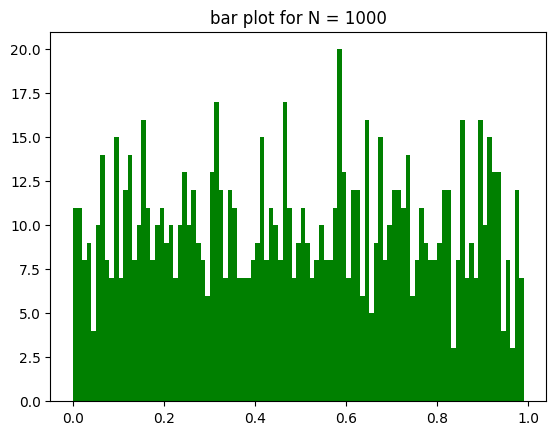

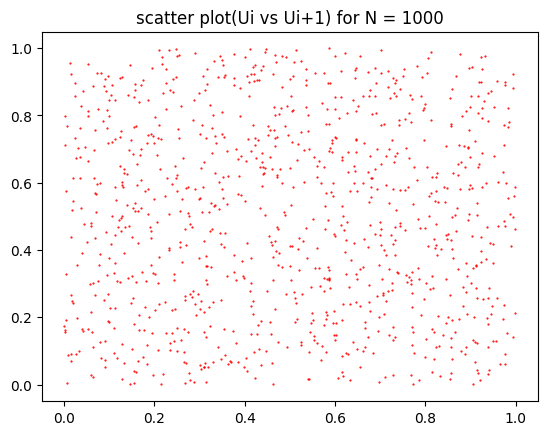

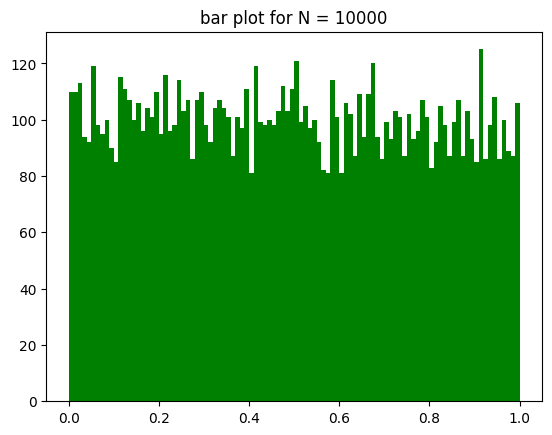

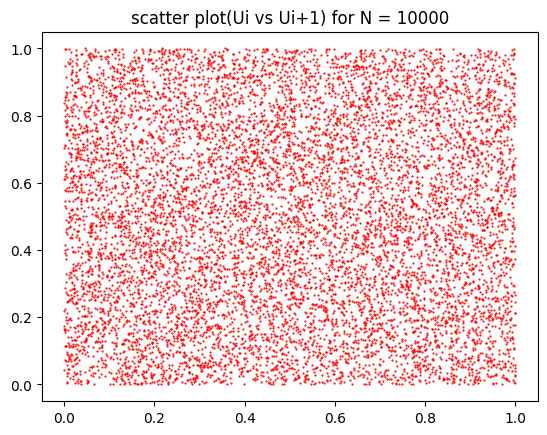

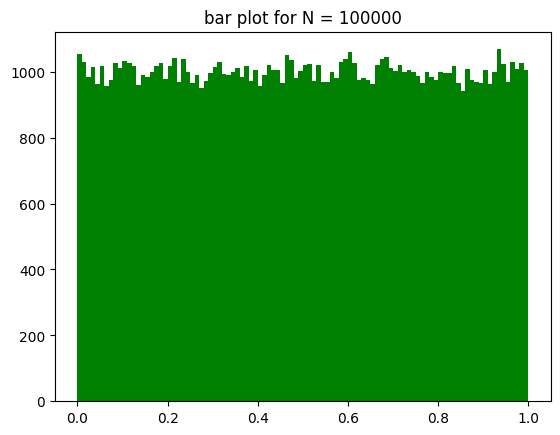

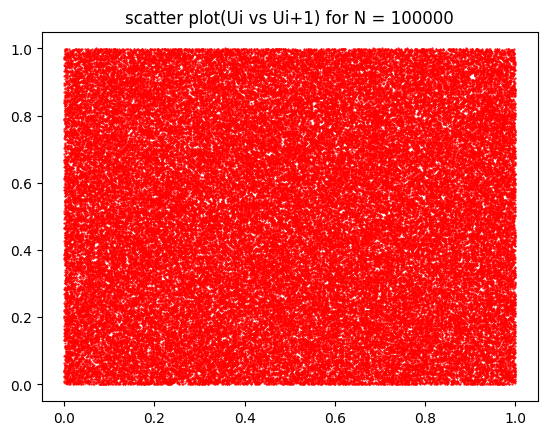

In [3]:
cases = [1000, 10000, 100000]

for N in cases:
    seq = generator1(1597, 1, 244944, 3, N)
    plt.hist(seq, bins=np.arange(min(seq), max(seq)+0.001, 0.01), color='g', linewidth=0.2)
    plt.title('bar plot for N = '+str(N))
    plt.show()

    x=[]
    y=[]
    for i in seq:
        x.append(i)
    x.pop()
    for i in range(1, N):
        y.append(seq[i])

    fig, ax = plt.subplots()
    ax.scatter(x, y, alpha=1, color='r', s=0.3)
    plt.title('scatter plot(Ui vs Ui+1) for N = '+str(N))
    plt.show()


## Q2

In [4]:
def linearGenerator(a, b, m, seed, N):
	ui = []
	x = seed
	for _ in range(N):
		x = (a*x + b) % m
		ui.append(x/m)
	return ui

def generator2(N, theta):
	x = linearGenerator(123, 2, 13241, 2, N)

	X = []
	for i in x:
		u = -theta * math.log(1-i)
		X.append(u)
	return X

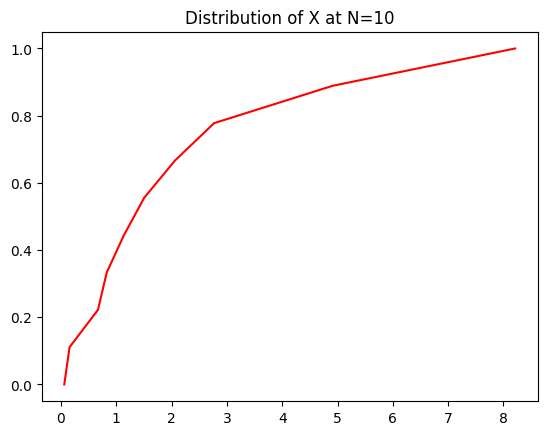

for 10 samples mean = 2.2305096009221885
for 10 samples variance = 5.842095983802902


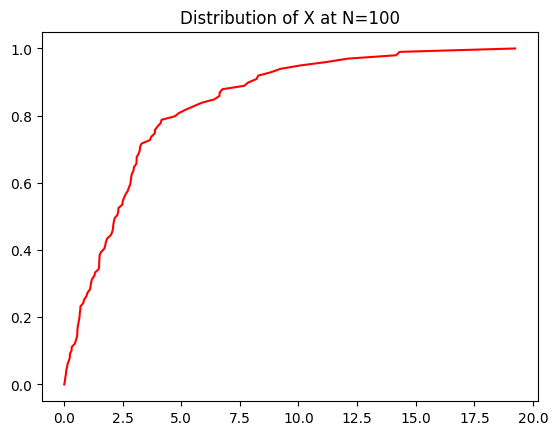

for 100 samples mean = 3.2247396125776895
for 100 samples variance = 11.98085780828704


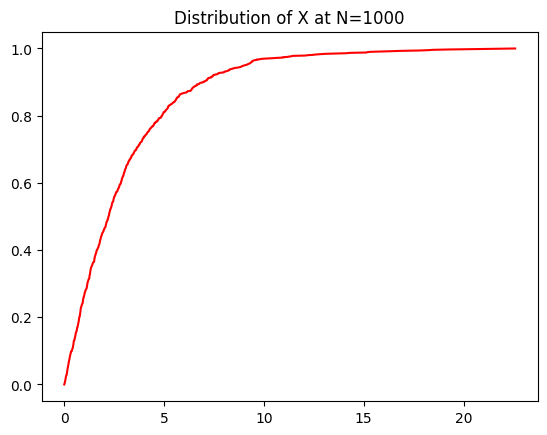

for 1000 samples mean = 3.081161111374821
for 1000 samples variance = 9.59241179375116


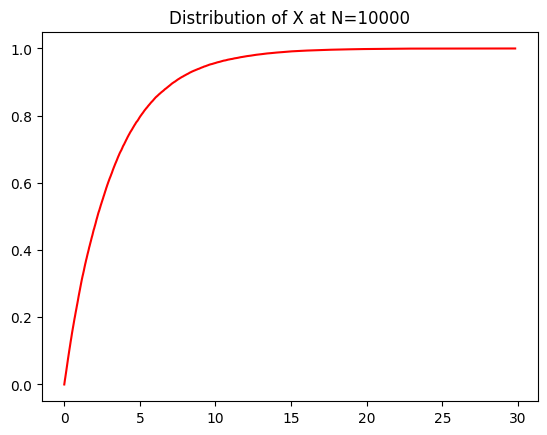

for 10000 samples mean = 3.1563771607678928
for 10000 samples variance = 10.017771389934223


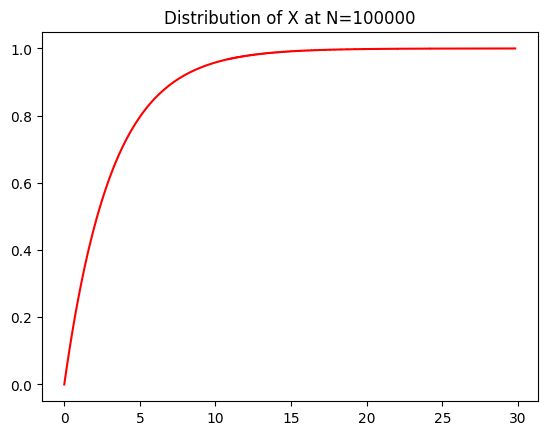

for 100000 samples mean = 3.1416862866656436
for 100000 samples variance = 9.85951207447013


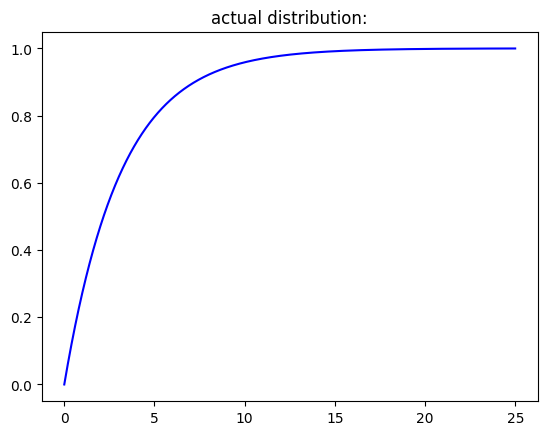

Actual mean = 3.141592653589793
Actual variance = 9.869604401089358


In [5]:
cases = [10, 100, 1000, 10000, 100000]

for i in cases:
    theta = cmath.pi
    X = generator2(i, theta)

    sort_y = np.sort(X)
    y_val = np.arange(len(sort_y))/float(len(sort_y)-1)
    plt.plot(sort_y, y_val, color='r')
    plt.title('Distribution of X at N='+str(i))
    plt.show()

    print("for", i, "samples mean =", np.mean(X))
    print("for", i, "samples variance =", np.var(X))


x = np.arange(0, 25, 0.01)
Fx = [ 1 - math.exp(-j/theta) for j in x ]
plt.plot(x, Fx, color='b')
plt.title('actual distribution:')
plt.show()

print("Actual mean =", cmath.pi)
print("Actual variance =", cmath.pi*cmath.pi)

## Q3

In [6]:
def generator3(N, theta):
	x = linearGenerator(123, 2, 13241, 2, N)

	X = []
	for i in x:
		u = 0.5 - 0.5*(math.cos(i * theta))
		X.append(u)
	return X

3.141592653589793


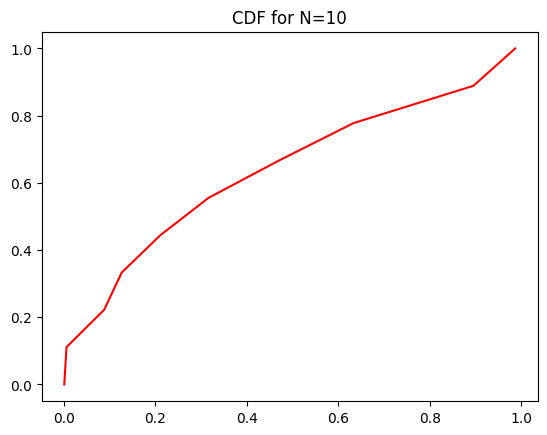

for 10 samples mean = 0.37347798353615164
for 10 samples variance = 0.11717232248515157
3.141592653589793


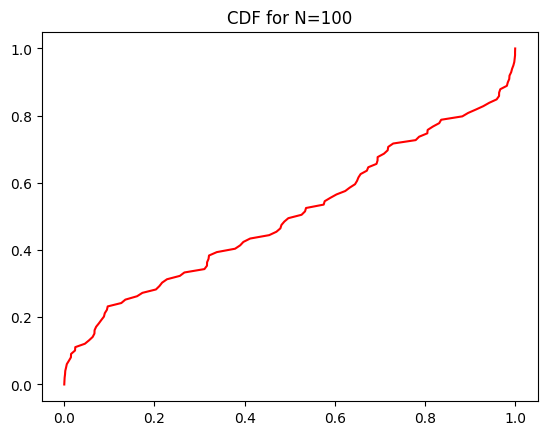

for 100 samples mean = 0.4945329062603193
for 100 samples variance = 0.12066235544391767
3.141592653589793


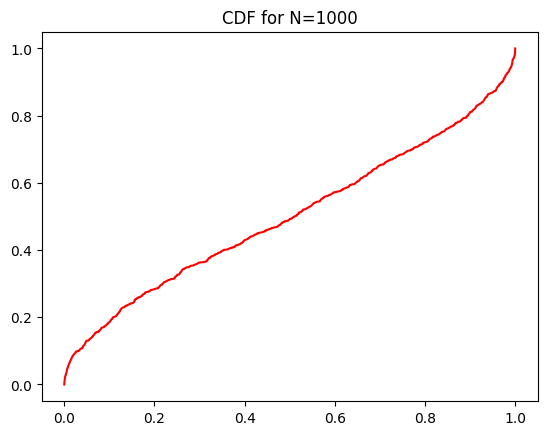

for 1000 samples mean = 0.4989849034206795
for 1000 samples variance = 0.11906164185832245
3.141592653589793


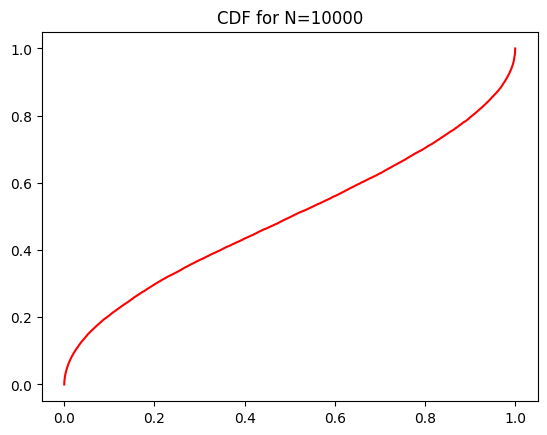

for 10000 samples mean = 0.500682895969179
for 10000 samples variance = 0.12555147882558407
3.141592653589793


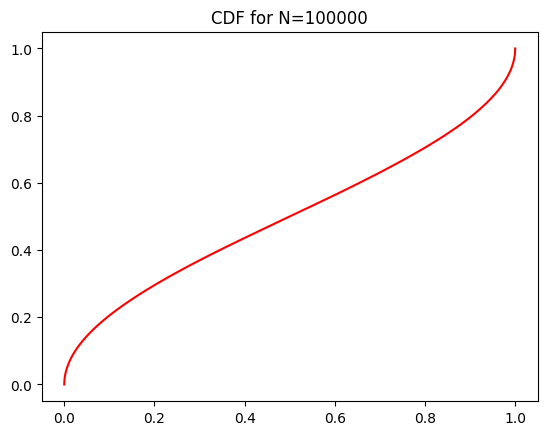

for 100000 samples mean = 0.4998735233307937
for 100000 samples variance = 0.12507022069752055


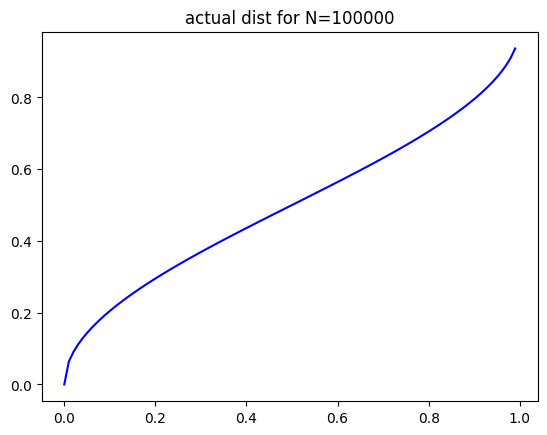

In [7]:
cases = [10, 100, 1000, 10000, 100000]
theta = cmath.pi

for i in cases:
    print(theta)
    X = generator3(i, theta)

    sort_y = np.sort(X)
    y_val = np.arange(len(sort_y))/float(len(sort_y)-1)
    plt.plot(sort_y, y_val, color='r')
    plt.title('CDF for N=' + str(i))
    plt.show()

    print("for", i, "samples mean =", np.mean(X))
    print("for", i, "samples variance =", np.var(X))


x = np.arange(0, 1, 0.01)
Fx = [ (2/theta) * np.arcsin(math.sqrt(j)) for j in x ]
plt.plot(x, Fx, color='b')
plt.title('actual dist for N='+str(i))
plt.show()

## Q4

In [8]:
def generate_discrete_uniform_samples(N):
    values = np.arange(1, 10000, 2)
    probabilities = np.full(len(values), 1 / len(values))
    return np.random.choice(values, N, p=probabilities)

def tabulate_frequency(p, samples, columns=5, range_size=1000):
    ranges = np.arange(1, 10000, range_size)
    frequencies = {range_val: 0 for range_val in ranges}

    for sample in samples:
        for range_val in ranges:
            if sample >= range_val and sample < range_val + range_size:
                frequencies[range_val] += 1
                break

    rows = len(frequencies) // columns + (1 if len(frequencies) % columns != 0 else 0)
    for row in range(rows):
        row_ranges = list(frequencies.keys())[row::rows]
        row_counts = [frequencies[val] for val in row_ranges]
        if(p==1):
          print("\n".join(f"{val}-{val+range_size-1}: {count:5}" for val, count in zip(row_ranges, row_counts)))

    return frequencies

N = 100000
samples = generate_discrete_uniform_samples(N)

frequency_dict = tabulate_frequency(1, samples, columns=5, range_size=1000)

1-1000: 10026
2001-3000: 10015
4001-5000:  9958
6001-7000:  9960
8001-9000: 10159
1001-2000:  9898
3001-4000:  9946
5001-6000: 10062
7001-8000: 10083
9001-10000:  9893


[9540, 10761, 8794, 9549, 9087, 10915, 10609, 11051, 9240, 10454]


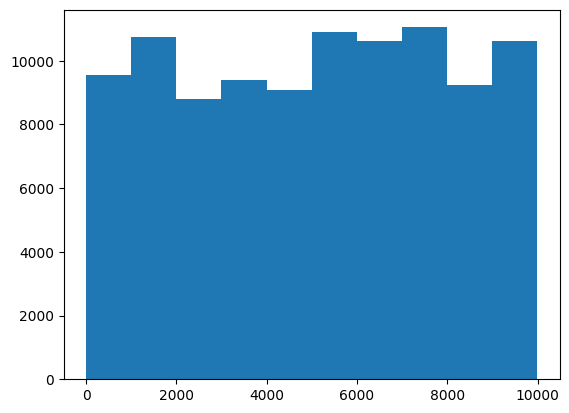

In [9]:
a = 1597
m = 24494
b = 0

x = 1

N = 100000
Lista = linGen(a, b, m, x, N)

Listb = []
for it in range(0,N):
    if int(Lista[it]*10000)%2 == 0:
        Listb.append(int(Lista[it]*10000) - 1)
    else:
        Listb.append(int(Lista[it]*10000))
Listfreq = []
for it in range(0,10):
    Listfreq.append(0)
for it in range(0,N):
    Listfreq[int(Listb[it]/1000)] = Listfreq[int(Listb[it]/1000)]+1
Lista.pop()
print(Listfreq)
plt.hist(Listb,10)
plt.show()